In [ ]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import graphviz as gv
import math
import heapq as hq
from google.colab import files

In [ ]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [ ]:
def setEmptyGraph(size):
  n = size*size
  G = [ [] for _ in range(n) ]
  for x in range(size):
    for y in range(size):
      if(size > x + 1):
        G[ ((x * size) + y) ].append(((x+1) * size) + y)
      if(0 <= x - 1):
        G[ ((x * size) + y) ].append(((x-1) * size) + y)
      if(size > y + 1):
        G[ ((x * size) + y) ].append((x * size) + (y+1))
      if(0 <= y - 1):
        G[ ((x * size) + y) ].append((x * size) + (y-1))
  return G

def setKnownPoints(size, almacen, entrega):
  id = ["empty"]*(size*size)
  for a in almacen:
    x, y = a[0], a[1]
    pos = x*size + y
    id[pos] = "A"
  for a in entrega:
    x, y = a[0], a[1]
    pos = x*size + y
    id[pos] = "E"
  return id

def getGraphWeighted(G):
  adjlListWeighted = [[] for i in range(len(G))]
  for i in range(len(G)):
    for j in range(len(G[i])):
      adjlListWeighted[i].append(   ( G[i][j], round( math.sqrt( (( (i // (len(G)/2) ) - (G[i][j] //  (len(G)/2) ) )**2) + (( (i %  (len(G)/2) ) - (G[i][j] %  (len(G)/2) ) )**2)   )          )  )    )
  return adjlListWeighted

[[4, 1], [5, 2, 0], [6, 3, 1], [7, 2], [8, 0, 5], [9, 1, 6, 4], [10, 2, 7, 5], [11, 3, 6], [12, 4, 9], [13, 5, 10, 8], [14, 6, 11, 9], [15, 7, 10], [8, 13], [9, 14, 12], [10, 15, 13], [11, 14]]
['A', 'A', 'empty', 'empty', 'E', 'E', 'A', 'empty', 'E', 'A', 'empty', 'empty', 'A', 'E', 'empty', 'empty']
[[(4, 4), (1, 1)], [(5, 4), (2, 1), (0, 1)], [(6, 4), (3, 1), (1, 1)], [(7, 4), (2, 1)], [(8, 4), (0, 4), (5, 1)], [(9, 4), (1, 4), (6, 1), (4, 1)], [(10, 4), (2, 4), (7, 1), (5, 1)], [(11, 4), (3, 4), (6, 1)], [(12, 4), (4, 4), (9, 1)], [(13, 4), (5, 4), (10, 1), (8, 1)], [(14, 4), (6, 4), (11, 1), (9, 1)], [(15, 4), (7, 4), (10, 1)], [(8, 4), (13, 1)], [(9, 4), (14, 1), (12, 1)], [(10, 4), (15, 1), (13, 1)], [(11, 4), (14, 1)]]


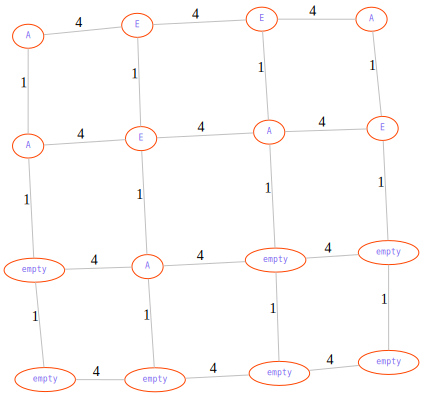

In [ ]:
alm = [[0,1],[1,2],[0,0],[3,0],[2,1]]
ent = [[1,0],[1,1],[2,0],[3,1]]

size = 4

Gp = setEmptyGraph(size)
print(Gp)

labels = setKnownPoints(size, alm, ent)
print(labels)

GWp = getGraphWeighted(Gp)
print(GWp)

adjlShow(GWp, labels=labels, weighted=True)

In [ ]:
graphFile = open('adjlistexample.txt', 'w')
with graphFile:
  writer = csv.writer(graphFile)
  writer.writerows(Gp)

In [ ]:
def getAlmPoint(size, almacen):
  alm = []
  for a in almacen:
    x, y = a[0], a[1]
    pos = x*size + y
    alm.append(pos)
  return alm

def getCoord(pos, size):
  x = pos // size
  y = pos % size
  return [x, y]

def getEntPoint(size, entrega):
  ent = []
  for a in entrega:
    x, y = a[0], a[1]
    pos = x*size + y
    ent.append(pos)
  return ent

In [ ]:
size = 4

arregloAlmP = getAlmPoint(size,alm)
print(arregloAlmP)

arregloEntP = getEntPoint(size,ent)
print(arregloEntP)


[1, 6, 0, 12, 9]
[4, 5, 8, 13]


In [ ]:
def dfs_stack(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  stack = [s]
  while stack:
    u = stack.pop()
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          parent[v] = u
          stack.append(v)

  return parent

In [ ]:
def dfsEntregas(almacenes, entregas, G):
  caminos = []
  for i in almacenes:
    path = dfs_stack(G, i)
    caminos.append(path)
  return caminos


In [ ]:
entregas = dfsEntregas(arregloAlmP, arregloEntP, Gp)
for i in range(len(arregloAlmP)):
  print("Almacen", arregloAlmP[i],":",entregas[i])

Almacen 1 : [1, None, 3, 7, 0, 4, 5, 6, 9, 10, 11, 7, 8, 12, 13, 14]
Almacen 6 : [4, 0, 1, 2, 5, 6, None, 3, 9, 10, 11, 7, 8, 12, 13, 14]
Almacen 0 : [None, 0, 1, 2, 5, 6, 7, 3, 4, 8, 9, 10, 13, 14, 15, 11]
Almacen 12 : [1, 2, 3, 7, 8, 4, 5, 6, 9, 10, 11, 15, None, 12, 13, 14]
Almacen 9 : [1, 2, 3, 7, 8, 4, 5, 6, 9, None, 11, 7, 13, 14, 10, 14]
